In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Loading the dataframe


In [3]:

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [5]:
data.shape

(90, 18)

In [9]:
Y=data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [10]:
transform = preprocessing.StandardScaler()

In [11]:
X=transform.fit_transform(X)

In [12]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((72, 83), (72,), (18, 83), (18,))

we can see we only have 18 test samples.


# Logistic Regression

In [14]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [15]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logregcv=GridSearchCV(lr, parameters, cv=10)

In [16]:
logregcv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [17]:
print("tuned hpyerparameters :(best parameters) ",logregcv.best_params_)
print("accuracy :",logregcv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [18]:
logregcv.score(X_test, Y_test)

0.8333333333333334

Lets look at the confusion matrix:


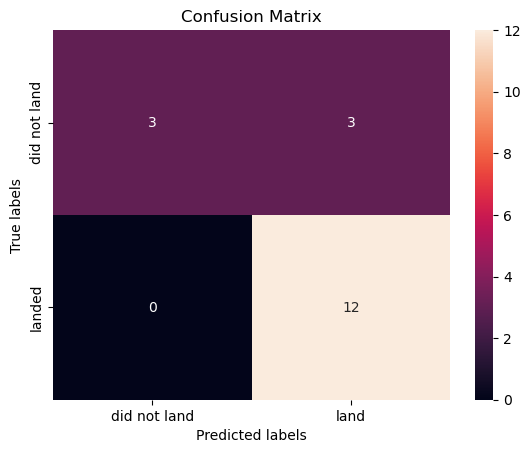

In [19]:
yhat=logregcv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# SVM

In [20]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv=GridSearchCV(svm, parameters, cv=10)

In [72]:
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [73]:
print("Tuned hyperparameters: ", svm_cv.best_params_)
print("Accuracy: ", svm_cv.best_score_)

Tuned hyperparameters:  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy:  0.8482142857142856


In [74]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [24]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


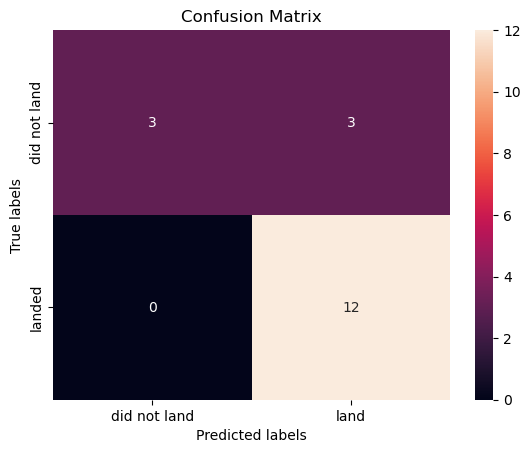

In [25]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Decision Tree

In [57]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv=GridSearchCV(tree, parameters, cv=10)

In [ ]:
tree_cv.fit(X_train, Y_train)

In [59]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8892857142857145


In [61]:
tree_cv.score(X_test, Y_test)

0.7222222222222222

We can plot the confusion matrix


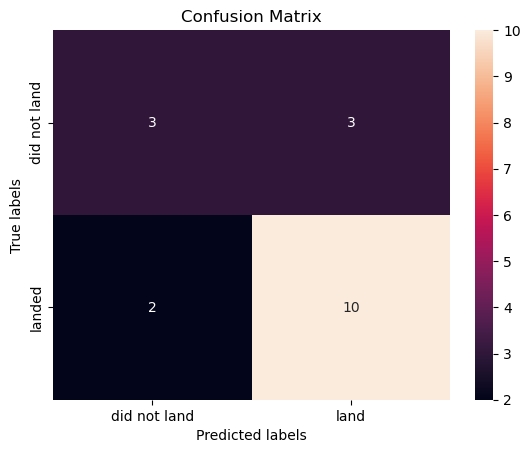

In [60]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# K Nearest Neighbours

In [31]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv=GridSearchCV(KNN, parameters, cv=10)

In [32]:
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [33]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [34]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


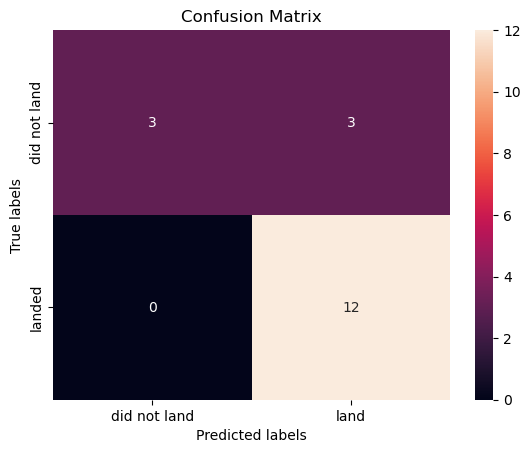

In [35]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Now comparing all the above models to select the best one:

In [75]:
logreg=logregcv.score(X_test, Y_test)
tree=tree_cv.score(X_test, Y_test)
svm=svm_cv.score(X_test, Y_test)
knn=knn_cv.score(X_test, Y_test)

(0.8333333333333334,
 0.7222222222222222,
 0.8333333333333334,
 0.8333333333333334)

In [76]:
dic={'Model': ['LR', 'BT', 'SVM', 'KNN'],
     'Accuracy':[logreg, tree, svm, knn]}
t=pd.DataFrame(dic)
t.set_index('Model', inplace=True)

In [77]:
t.transpose()

Model,LR,BT,SVM,KNN
Accuracy,0.833333,0.722222,0.833333,0.833333


<Axes: xlabel='Model'>

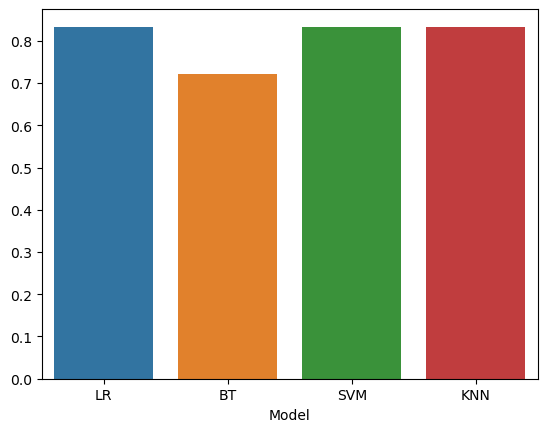

In [78]:
sns.barplot(t.transpose())

We can infer that, SVM, KNN and LR are the best performing models.